In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append(r'C:\Users\rshaw\Desktop\EC Utbildning - Data Science\Kurs 9 - Project\Project\ds23_projektkurs\predictive-maintenance\src\Data processing scripts')

In [2]:
from SQL_module import SQLManager
sql_manager = SQLManager('SQLManagerLogger', 'sql_manager_log.log')
engine = sql_manager.new_engine(
    dialect='mssql',  
    server='MSI',  
    database='predictive_maintenance_db',  
    integrated_security=True  
)

def load_data(table_name):
    query = f"SELECT * FROM {table_name}"
    df = sql_manager.fetch_data(query)
    return df

errors_df = load_data('PdM_errors')
failures_df = load_data('PdM_failures')
machines_df = load_data('PdM_machines')
maint_df = load_data('PdM_maint')
telemetry_df = load_data('PdM_telemetry')


In [3]:
print("Errors DataFrame:")
display(errors_df.head())

print("Failures DataFrame:")
display(failures_df.head())

print("Machines DataFrame:")
display(machines_df.head())

print("Maintenance DataFrame:")
display(maint_df.head())

print("Telemetry DataFrame:")
display(telemetry_df.head())


Errors DataFrame:


,datetime,machineID,errorID,date
0,2015-01-03 07:00:00,1,error1,2015-01-03
1,2015-01-03 20:00:00,1,error3,2015-01-03
2,2015-01-04 06:00:00,1,error5,2015-01-04
3,2015-01-10 15:00:00,1,error4,2015-01-10
4,2015-01-22 10:00:00,1,error4,2015-01-22


Failures DataFrame:


,datetime,machineID,failure,date
0,2015-01-05 06:00:00,1,comp4,2015-01-05
1,2015-03-06 06:00:00,1,comp1,2015-03-06
2,2015-04-20 06:00:00,1,comp2,2015-04-20
3,2015-06-19 06:00:00,1,comp4,2015-06-19
4,2015-09-02 06:00:00,1,comp4,2015-09-02


Machines DataFrame:


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


Maintenance DataFrame:


,datetime,machineID,comp,date
0,2014-06-01 06:00:00,1,comp2,2014-06-01
1,2014-07-16 06:00:00,1,comp4,2014-07-16
2,2014-07-31 06:00:00,1,comp3,2014-07-31
3,2014-12-13 06:00:00,1,comp1,2014-12-13
4,2015-01-05 06:00:00,1,comp4,2015-01-05


Telemetry DataFrame:


,datetime,machineID,volt,rotate,pressure,vibration,date
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015-01-01
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,2015-01-01
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,2015-01-01
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,2015-01-01
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,2015-01-01


In [4]:
print(failures_df.head())
print(failures_df['datetime'].min(), failures_df['datetime'].max())


             datetime  machineID failure        date
0 2015-01-05 06:00:00          1   comp4  2015-01-05
1 2015-03-06 06:00:00          1   comp1  2015-03-06
2 2015-04-20 06:00:00          1   comp2  2015-04-20
3 2015-06-19 06:00:00          1   comp4  2015-06-19
4 2015-09-02 06:00:00          1   comp4  2015-09-02
2015-01-02 03:00:00 2015-12-31 06:00:00


In [5]:
print(telemetry_df.head())
print(telemetry_df['datetime'].min(), telemetry_df['datetime'].max())


             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration        date  
0  45.087686  2015-01-01  
1  43.413973  2015-01-01  
2  34.178847  2015-01-01  
3  41.122144  2015-01-01  
4  25.990511  2015-01-01  
2015-01-01 06:00:00 2016-01-01 06:00:00


In [6]:
df_sel_17 = telemetry_df.loc[telemetry_df['machineID'] == 17].reset_index(drop=True)
print(df_sel_17.head(n=5))

             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00         17  161.633747  462.698035   90.377391   
1 2015-01-01 07:00:00         17  189.976790  372.798586  100.125906   
2 2015-01-01 08:00:00         17  186.476591  498.922070   97.924391   
3 2015-01-01 09:00:00         17  167.836488  483.978488  111.113911   
4 2015-01-01 10:00:00         17  182.431544  502.774702  108.220639   

   vibration        date  
0  49.453414  2015-01-01  
1  57.482661  2015-01-01  
2  47.786767  2015-01-01  
3  66.352721  2015-01-01  
4  54.571089  2015-01-01  


In [7]:
df_sel_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   8761 non-null   datetime64[ns]
 1   machineID  8761 non-null   int64         
 2   volt       8761 non-null   float64       
 3   rotate     8761 non-null   float64       
 4   pressure   8761 non-null   float64       
 5   vibration  8761 non-null   float64       
 6   date       8761 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 479.2+ KB


In [8]:
df_sel_17.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
datetime,8761,NaN,NaN,NaN,2015-07-02 18:00:00,2015-01-01 06:00:00,2015-04-02 12:00:00,2015-07-02 18:00:00,2015-10-02 00:00:00,2016-01-01 06:00:00,NaN
machineID,8761.0,NaN,NaN,NaN,17.0,17.0,17.0,17.0,17.0,17.0,0.0
volt,8761.0,NaN,NaN,NaN,170.726237,107.286569,160.150078,170.5033,181.075973,240.105419,15.694063
rotate,8761.0,NaN,NaN,NaN,445.968525,223.26815,411.696585,446.855943,482.323013,637.852152,53.034564
pressure,8761.0,NaN,NaN,NaN,101.342908,66.079113,93.97646,100.851812,107.9455,152.605505,11.325382
vibration,8761.0,NaN,NaN,NaN,40.549045,20.487291,36.896442,40.320077,43.925871,70.587984,5.516199
date,8761,366,2015-12-31,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Sensor Ranges: All sensor readings (voltage, rotation, pressure, vibration) show reasonable variability, with voltage and rotation having the highest range of values.

- Relatively Low Variation in Vibration: The vibration sensor has the lowest standard deviation, meaning its values are more tightly clustered around the mean compared to other sensors

In [9]:
df_sel_17.duplicated().sum()

np.int64(0)

In [10]:
round(df_sel_17.isnull().sum() / df_sel_17.isnull().count() * 100, 2)

datetime     0.0
machineID    0.0
volt         0.0
rotate       0.0
pressure     0.0
vibration    0.0
date         0.0
dtype: float64

In [11]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(df_sel_17, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df_sel_17, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df_sel_17, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df_sel_17, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df_sel_17[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df_sel_17[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Skipping column: datetime
Skipping column: machineID
Skipping column: date


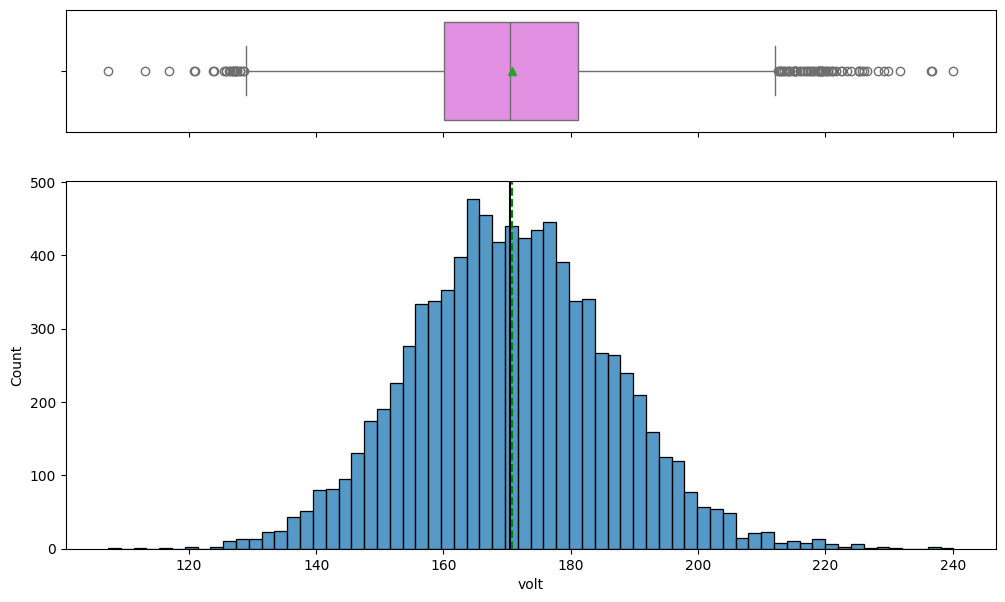

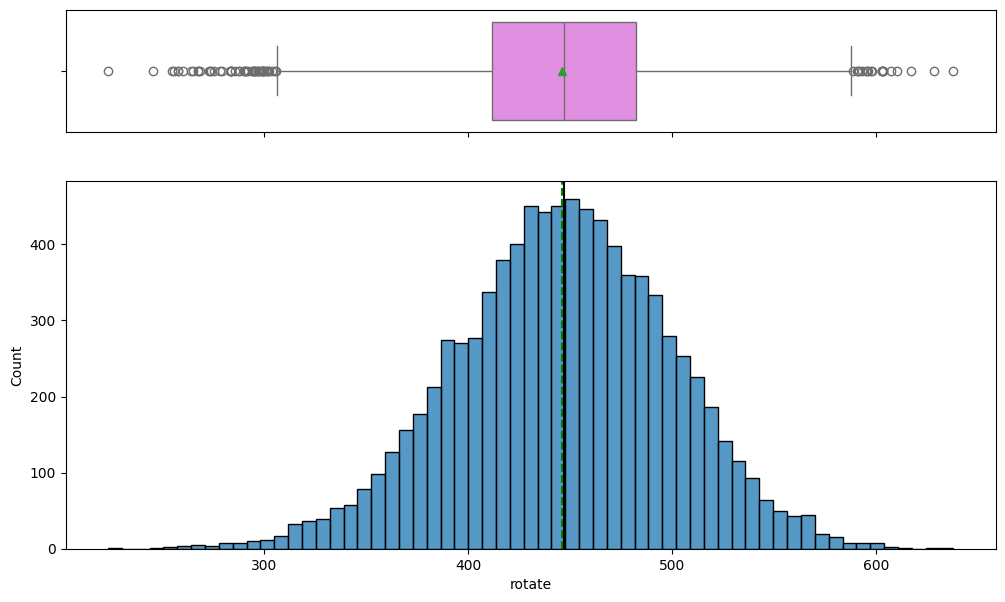

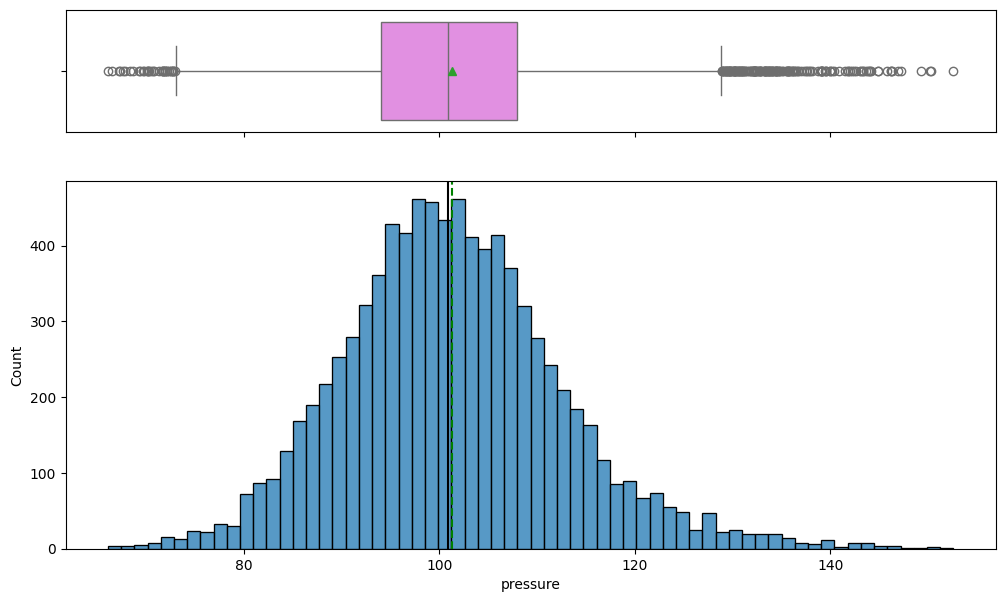

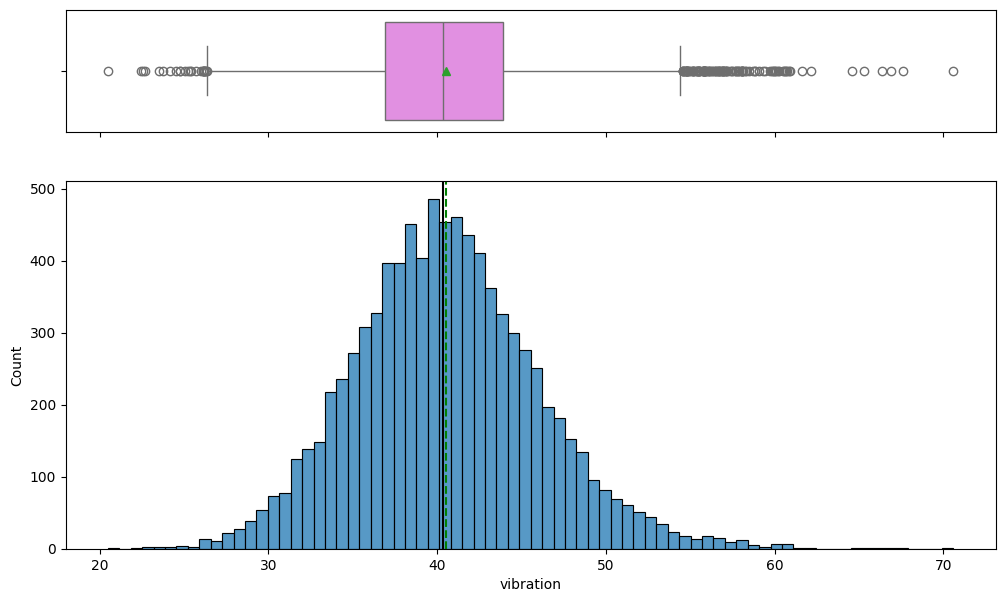

In [14]:
def is_numeric(series):
    return pd.api.types.is_numeric_dtype(series)

# Loop through columns, but only plot numeric features and skip 'machineID'
for feature in df_sel_17.columns:
    if is_numeric(df_sel_17[feature]) and feature != 'machineID':
        histogram_boxplot(df_sel_17, feature, figsize=(12, 7), kde=False, bins=None)
    else:
        print(f"Skipping column: {feature}")

- Most of the sensors are showing normal distribution with both the mean and median values very close to each other.
- The Standard Deviation is under 3 for just over 50% of the sensor readings, indicating a slightly higher spread in the data from the mean for these sensors.
- At the same time, most of these sensors have a range of outliers on both the lower and upper sides. They do not seem to dramatically impact the mean values.
- Rotation has a slight right skew and vibration has a slight left skew.

Approx X% of machines show no failure.
This shows that the distribution of classes in the target variable is imbalanced. We have only ~5% observations where the machines failed.

In [ ]:
# Check failure record of machine 11
sel_fail = failures_df.loc[failures_df['machineID'] == 17]
pd.DataFrame(sel_fail)